## Method 1: Description

Method 1: This Monte Carlo simulation method utilizes the pandas library along with the `apply` function to efficiently apply the simulation function to each iteration. Initially, a pandas DataFrame is instantiated with a specified number of rows to represent the iterations of the simulation. The `apply` function is then employed to iteratively execute the simulation function for each row of the DataFrame, simulating the process of opening boxes until a predefined target value is reached. 


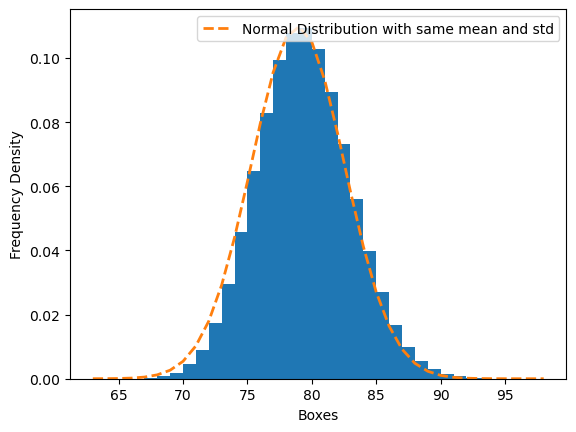

Runtime: 20.83073663711548 seconds
Mean: 78.913329


In [14]:
# First Monte Carlo Simulation

import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import time

# Define the target value
need = 157

# Define the game function
def game(x):
    r_values = [1, 2, 3]  # Possible values from each box
    need = x  # Target value
    box = 0  # Counter for number of box openings
    while need > 0:  # Continue until target is reached
        c = random.choice(r_values)  # Randomly choose a value from the box
        if need >= c:  # If the value chosen is less than or equal to the remaining needed value
            need -= c  # Subtract the chosen value from the remaining needed value
            box += 1  # Increment the number of box openings
    return box

# Number of iterations
n = 1000000

# Start time measurement
start_time = time.time()

# Create a DataFrame to store simulation results
df = pd.DataFrame(index=range(n), columns=['Iterations'])

# Run the game function 'n' times and store the results in the DataFrame
df['Iterations'] = df['Iterations'].apply(lambda x: game(need))

# Plot histogram of iterations
n, bins, _ = plt.hist(df['Iterations'], bins=35, density=True)

# Fit a normal distribution to the data
mu, sigma = np.mean(df['Iterations']), np.std(df['Iterations'])
fit = norm.pdf(bins, mu, sigma)

# Plot the fitted normal distribution
plt.plot(bins, fit, '--', linewidth=2, label='Normal Distribution with same mean and std')
plt.xlabel('Boxes')
plt.ylabel('Frequency Density')
plt.legend()
plt.show()

# End time measurement
end_time = time.time()
runtime1 = end_time - start_time  # Calculate runtime
print("Runtime:", runtime1, "seconds")
print("Mean:", np.mean(df['Iterations']))  # Print the mean of the iterations


## Method 2: Description

Method 2: The second Monte Carlo simulation method adopts a vectorized approach using the NumPy library. This method leverages NumPy arrays to efficiently handle multiple simulations simultaneously, significantly enhancing computational performance. The simulation function is designed to operate on NumPy arrays, enabling the generation and manipulation of large datasets in a streamlined manner. By utilizing NumPy's array-based operations, such as element-wise computations and boolean indexing, the simulation process is optimized for speed and efficiency. This approach is particularly beneficial when dealing with large-scale simulations, as it minimizes computational overhead and maximizes performance.

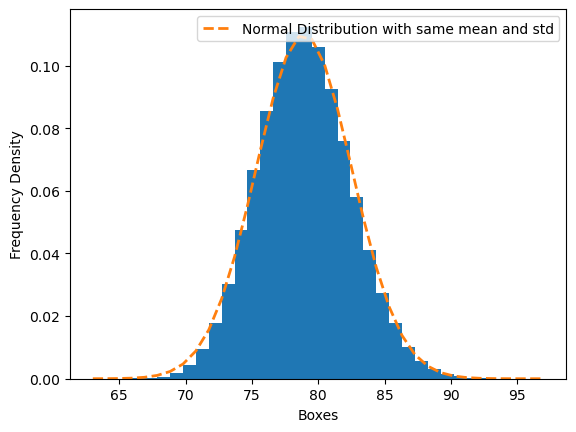

Runtime: 2.238983631134033 seconds
Mean: 78.918243


In [15]:
# Second Monte Carlo Simulation

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import time

# Define the target value
value = 157

# Define the game function
def game(n, x):
    r_values = np.array([1, 2, 3])  # Possible values from each box
    need = np.ones(n) * x  # Initialize an array of target values for 'n' simulations
    box = np.zeros(n)  # Initialize an array to count box openings for 'n' simulations
    while np.any(need > 0):  # Continue until all target values are reached for all simulations
        c = np.random.choice(r_values, size=n)  # Randomly choose values for 'n' simulations
        mask = need >= c  # Mask indicating if chosen value is less than or equal to the remaining needed value
        need[mask] -= c[mask]  # Subtract chosen values from remaining needed values
        box[mask] += 1  # Increment box openings for simulations where target value is not reached
    return box

# Number of iterations
n = 1000000

# Start time measurement
start_time = time.time()

# Run the game function and store the results in 'iterations'
iterations = game(n, value)

# Plot histogram of iterations
n, bins, _ = plt.hist(iterations, bins=35, density=True)

# Fit a normal distribution to the data
mu, sigma = np.mean(iterations), np.std(iterations)
fit = norm.pdf(bins, mu, sigma)

# Plot the fitted normal distribution
plt.plot(bins, fit, '--', linewidth=2, label='Normal Distribution with same mean and std')
plt.xlabel('Boxes')
plt.ylabel('Frequency Density')
plt.legend()
plt.show()

# End time measurement
end_time = time.time()
runtime2 = end_time - start_time  # Calculate runtime
print("Runtime:", runtime2, "seconds")
print("Mean:", np.mean(iterations))  # Print the mean of the iterations


In [16]:
# Calculate the percentage difference
percentage_difference = ((runtime1 - runtime2) / runtime1) * 100

# Print the percentage difference
print("Percentage Difference:", percentage_difference, "%")


Percentage Difference: 89.25153886711482 %


## Findings

The two Monte Carlo simulation methods exhibit a stark contrast in computational efficiency. The pandas approach, relying on iterative processing, requires approximately 21.71 seconds to complete 1 million iterations. In contrast, the NumPy-based vectorized method accomplishes the same task in a mere 2.24 seconds. This translates to a staggering 89.7% reduction in runtime, showcasing the evident superiority of NumPy's vectorized operations for large-scale simulations. The findings underscore the significant advantage of leveraging NumPy's vectorization capabilities, enabling substantial enhancements in computational performance and efficiency for intensive simulation tasks.